In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [33]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [34]:
data_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [35]:
data_auto.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [36]:
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()

In [37]:
data_auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000,406
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966,NaN
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000,NaN
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000,NaN


## se observa que la relación NO es lineal

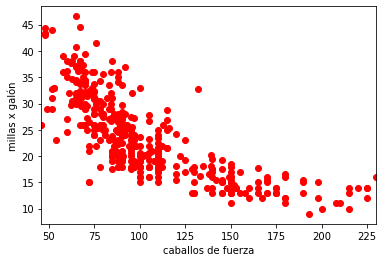

In [38]:
plt.plot(data_auto['horsepower'], data_auto['mpg'], "ro")
plt.xlim(data_auto['horsepower'].min(), data_auto['horsepower'].max())
plt.xlabel('caballos de fuerza')
plt.ylabel('millas x galón')
plt.show()

### cargo las variables.

In [39]:
x1 = data_auto['horsepower'].fillna(np.mean(data_auto['horsepower'].mean()))
y = data_auto['mpg'].fillna(np.mean(data_auto['mpg'].mean()))

### al problema del reshape de "x" lo soluciono con np.newaxis, agregando una dimensión a la x original

In [40]:
lm = LinearRegression()
x = x1[:,np.newaxis]
lm.fit(x, y)

LinearRegression()

In [41]:
y_pred = lm.predict(x)

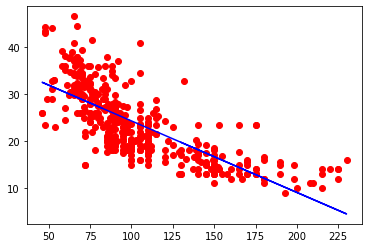

In [42]:
plt.plot(x, y, 'ro')
plt.plot(x, y_pred, "b")

In [43]:
lm.score(x, y)

0.574653340645025

In [44]:
ssd = np.sum((y_pred-y)**2)
rse = np.sqrt(ssd/(len(x)-1))
y_mean = np.mean(y)
error = rse/y_mean
print("ssd: {}, \nrse: {}, \nconsumo promedio: {}, \nerror: {}".format(ssd, rse, y_mean, error*100))

ssd: 10315.75196006092, 
rse: 5.046879480825511, 
consumo promedio: 23.51457286432162, 
error: 21.46277336163346


# <font color='red'>Modelo de regresión cuadrático</font>

* mpg = a + b * horsepower**2

In [45]:
x = x**2

In [46]:
lm.fit(x, y)
lm.score(x, y)

0.4849887034823205

In [47]:
y_pred = lm.predict(x)

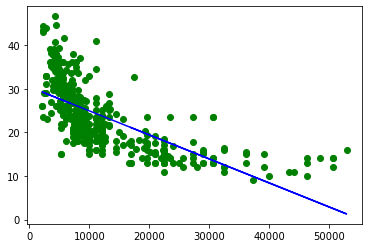

In [48]:
plt.plot(x, y, 'go')
plt.plot(x, y_pred, "b")

## el modelo cuadrático empeora las cosas

In [49]:
ssd = np.sum((y_pred-y)**2)
rse = np.sqrt(ssd/(len(x)-1))
y_mean = np.mean(y)
error = rse/y_mean
print("ssd: {}, \nrse: {}, \nconsumo promedio: {}, \nerror: {}".format(ssd, rse, y_mean, error*100))

ssd: 12490.350340501926, 
rse: 5.553410772769817, 
consumo promedio: 23.51457286432162, 
error: 23.6168898529981


**gráfica de los residuos**

(array([ 3.,  7., 21., 31., 47., 73., 94., 90., 37.,  3.]),
 array([-18.51989617, -15.41268269, -12.30546921,  -9.19825574,
         -6.09104226,  -2.98382878,   0.1233847 ,   3.23059818,
          6.33781166,   9.44502514,  12.55223862]),
 <a list of 10 Patch objects>)

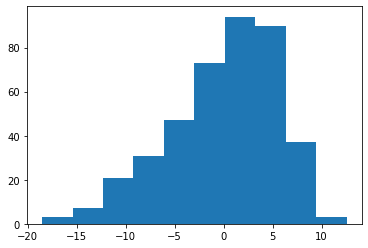

In [50]:
plt.hist((y_pred-y))

# <font color='red'>Regresión Polinómica</font>

* importo a linear_model y PolynomialFeatures
* la función es lineal y cuadrática: a la función "normal" le agrego, en este caso, la cuadrática
    * **mpg = a + b.horsepower + b.horsepower^2**

In [51]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

**por las dudas cargo nuevamente las variables**

In [52]:
x1 = data_auto['horsepower'].fillna(np.mean(data_auto['horsepower'].mean()))
y = data_auto['mpg'].fillna(np.mean(data_auto['mpg'].mean()))

**realizo la transformación**

In [53]:
poly = PolynomialFeatures(degree=2) #polinómica de grado 2
x = poly.fit_transform(x1[:,np.newaxis])

**aquí invoco a linear_model y a linearRegression**

In [54]:
lm = linear_model.LinearRegression()
lm.fit(x, y)
lm.score(x, y)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
y_pred = lm.predict(x)
plt.plot(x, y, 'co')
plt.plot(x, y_pred, "r")

## el modelo Polinómico es el que mejor resultados arrojó:

In [ ]:
ssd = np.sum((y_pred-y)**2)
rse = np.sqrt(ssd/(len(x)-1))
y_mean = np.mean(y)
error = rse/y_mean
print("ssd: {}, \nrse: {}, \nconsumo promedio: {}, \nerror: {}".format(ssd, rse, y_mean, error*100))

**creo una gráfica con los residuos**

In [ ]:
plt.hist((y_pred-y))

In [ ]:
mse = mean_squared_error(y, y_pred, squared=True)
print("mse : ",mse)
mse = mean_squared_error(y, y_pred, squared=False)
print("rmse: ", mse)
print("error: ", np.sqrt(mse)/np.mean(y)*100)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

**la función queda:**

### mpg = 55.02619 -0.43404318 * horsepower + 0.00112615 * horsepower^2

## hacer un bucle para crear modelos con <> grados

In [ ]:
x = data_auto['horsepower'].fillna(np.mean(data_auto['horsepower'].mean()))
for d in range(2, 15):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm.fit(x_data, y)
    print("grado {}:".format(d),lm.score(x_data, y))